# FreshBite Sales Prediction

### Data Cleaning

In [ ]:
# Load the df

import pandas as pd
import numpy as np 

df = pd.read_excel(r'Dataset\FreshBites_Dataset_20241203.xlsx',sheet_name=  'FreshBite_inconsistency')
df.head()

,Date,Customer ID,Sales Volume,Sales Revenue,Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,100.0,Tier 3,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,360.0,Tier 2,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,1,100.0,Tier 3,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,100.0,Tier 3,Europe,Summer,No,9.0
4,2022-10-01,CUST008,7,595.0,Tier 1,North America,Summer,Yes,3.0


In [2]:
# Check the number of rows and columns 

df.shape

(651, 9)

In [3]:
# Column names in the data

df.columns

Index(['Date', 'Customer ID', 'Sales Volume', 'Sales Revenue', 'Pricing Tier',
       'Region', 'Season', 'Promotion Applied', 'Delivery Time (Days)'],
      dtype='object')

In [3]:
# Drop the unneccessary columns
df.drop(columns=['Sales Revenue'],inplace=True)


In [4]:
# Renaming the columns

df = df.rename(columns={'Date': 'Order Date', 'Sales Volume': 'Sales Volumn (pallet/s)'})
df.head()

,Order Date,Customer ID,Sales Volumn (pallet/s),Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,Tier 3,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,Tier 2,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,1,Tier 3,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,Tier 3,Europe,Summer,No,9.0
4,2022-10-01,CUST008,7,Tier 1,North America,Summer,Yes,3.0


In [5]:
# Checking data type of columns

df.dtypes

Order Date                 datetime64[ns]
Customer ID                        object
Sales Volumn (pallet/s)            object
Pricing Tier                       object
Region                             object
Season                             object
Promotion Applied                  object
Delivery Time (Days)              float64
dtype: object

In [10]:
# convert the data type of columns

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Customer ID'] = df['Customer ID'].astype('string')
df['Sales Volumn (pallet/s)'] = df['Sales Volumn (pallet/s)'].astype('string')
df['Pricing Tier'] = df['Pricing Tier'].astype('string')
df['Region'] = df['Region'].astype('string')
df['Season'] = df['Season'].astype('string')
df['Promotion Applied'] = df['Promotion Applied'].astype('string')

In [8]:
# Convert the data type from Object to the float

# df['Sales Volumn (pallet/s)'] = pd.to_numeric(df['Sales Volumn (pallet/s)'], errors='coerce')


In [9]:
# After converting the data type of the columns

df.dtypes

Order Date                 datetime64[ns]
Customer ID                        string
Sales Volumn (pallet/s)            object
Pricing Tier                       string
Region                             string
Season                             string
Promotion Applied                  string
Delivery Time (Days)              float64
dtype: object

In [10]:
# To get summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Order Date               651 non-null    datetime64[ns]
 1   Customer ID              651 non-null    string        
 2   Sales Volumn (pallet/s)  651 non-null    object        
 3   Pricing Tier             651 non-null    string        
 4   Region                   627 non-null    string        
 5   Season                   651 non-null    string        
 6   Promotion Applied        651 non-null    string        
 7   Delivery Time (Days)     622 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1), string(5)
memory usage: 40.8+ KB


In [11]:
#Get summary statistics of Data
df.describe()

,Delivery Time (Days)
count,622.000000
mean,5.177653
std,3.027171
min,1.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,17.100000


In [20]:
# Check the value count of the sales volumn column

df['Sales Volumn (pallet/s)'].value_counts()

1      3
10     2
3      2
8      1
6      1
2      1
5      1
4      1
9      1
Name: Sales Volumn (pallet/s), dtype: int64

In [13]:
import re

def remove_txt_part(x):
    if isinstance(x, str):  # Check if x is a string
        match = re.search(r'Pallet\/s$', x)  # Regular expression for unit
        if match:
            x = re.sub(r'Pallet\/s$', '', x)
    return int(x)  # Convert to int (handle potential errors)

In [14]:
df['Sales Volumn (pallet/s)'] = df['Sales Volumn (pallet/s)'].apply(remove_txt_part)

In [16]:
df['Sales Volumn (pallet/s)'].value_counts()

1     117
6      80
5      73
7      63
10     55
3      54
4      53
8      53
9      41
2      37
11     14
12     11
Name: Sales Volumn (pallet/s), dtype: int64

In [17]:
# Check the value count of the Season column

df['Season'].value_counts()

Summer    422
Winter    200
summer     21
winter      8
Name: Season, dtype: Int64

In [21]:
# Capitalize all the values

df['Season'] = df['Season'].str.capitalize()
df['Season'].value_counts()


Summer    443
Winter    208
Name: Season, dtype: Int64

In [19]:
df.dtypes

Order Date                 datetime64[ns]
Customer ID                        string
Sales Volumn (pallet/s)             int64
Pricing Tier                       string
Region                             string
Season                             string
Promotion Applied                  string
Delivery Time (Days)              float64
dtype: object

In [22]:
#To count missing values in each column
df.isnull().sum()

Order Date                  0
Customer ID                 0
Sales Volumn (pallet/s)     0
Pricing Tier                0
Region                     24
Season                      0
Promotion Applied           0
Delivery Time (Days)       29
dtype: int64

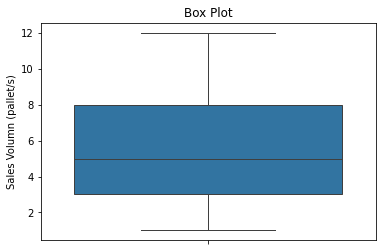

In [23]:
# Check the outlier to fill the missing values

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(data=df['Sales Volumn (pallet/s)'])
plt.title('Box Plot')
plt.show()

In [32]:
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(df['Delivery Time (Days)'], 25)
Q3 = np.percentile(df['Delivery Time (Days)'], 75)
IQR = Q3 - Q1

# Calculate outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df['Delivery Time (Days)'][(df['Delivery Time (Days)'] < lower_bound) | (df['Delivery Time (Days)'] > upper_bound)]
outliers

Series([], Name: Delivery Time (Days), dtype: float64)

In [ ]:
#To count missing values in each column

df.isnull().sum()

Order Date                  0
Customer ID                 0
Sales Volumn (pallet/s)     0
Sales Revenue               0
Pricing Tier                0
Region                     24
Season                      0
Promotion Applied           0
Delivery Time (Days)       29
dtype: int64

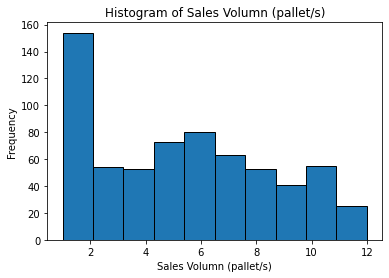

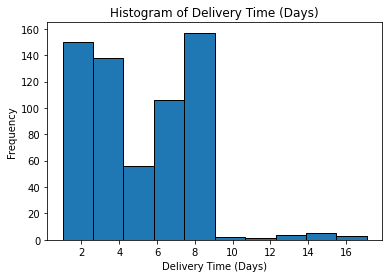

In [35]:
# Check the distribution of the column to fill the missing values

plt.figure(figsize=(6, 4))
plt.hist(df['Sales Volumn (pallet/s)'],edgecolor='black')
plt.title('Histogram of Sales Volumn (pallet/s)')
plt.xlabel('Sales Volumn (pallet/s)')
plt.ylabel('Frequency')

plt.figure(figsize=(6, 4))
plt.hist(df['Delivery Time (Days)'],edgecolor='black')
plt.title('Histogram of Delivery Time (Days)')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')

plt.show()

In [ ]:
# Check the skewness of the Delivery Time column

skewness = df['Delivery Time (Days)'].skew()
print(f"Skewness of Demand_Units: {skewness}")

Skewness of Demand_Units: 0.6068726085628887


The data is right skewed, you may need to scale it usig Robust scaling

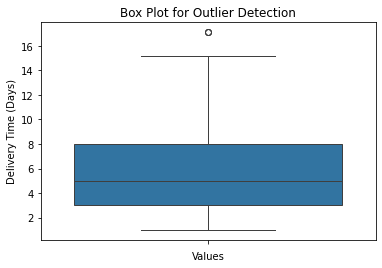

In [36]:

# Plot box plot
sns.boxplot(data=df['Delivery Time (Days)'])
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Values")
plt.show()

In [37]:
# Fill the missig vlues by mean, median and mode

# df['Sales Volumn (pallet/s)'] = df['Sales Volumn (pallet/s)'].fillna(df['Sales Volumn (pallet/s)'].mean())
df['Region'] = df['Region'].fillna(df['Region'].mode()[0]) 
df['Delivery Time (Days)'] = df['Delivery Time (Days)'].fillna(df['Delivery Time (Days)'].median())


In [38]:
# After filling the missing values

df.isnull().sum()

Order Date                 0
Customer ID                0
Sales Volumn (pallet/s)    0
Pricing Tier               0
Region                     0
Season                     0
Promotion Applied          0
Delivery Time (Days)       0
dtype: int64

In [40]:
# Checking the duplicate rows in data

df.duplicated().any()


False

In [41]:
# Remove Outlier

Q1 = df['Delivery Time (Days)'].quantile(0.25)
Q3 = df['Delivery Time (Days)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

new_df = df[(df['Delivery Time (Days)'] >= lower_bound) & (df['Delivery Time (Days)'] <= upper_bound)]



In [42]:
new_df

,Order Date,Customer ID,Sales Volumn (pallet/s),Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,Tier 3,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,Tier 2,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,1,Tier 3,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,Tier 3,Europe,Summer,No,9.0
4,2022-10-01,CUST008,7,Tier 1,North America,Summer,Yes,3.0
...,...,...,...,...,...,...,...,...
646,2024-09-28,CUST008,6,Tier 1,North America,Summer,No,5.0
647,2024-09-30,CUST001,10,Tier 1,Europe,Summer,Yes,4.0
648,2024-09-30,CUST004,7,Tier 1,Europe,Summer,Yes,5.0
649,2024-09-30,CUST007,2,Tier 2,South East Asia,Summer,Yes,8.0


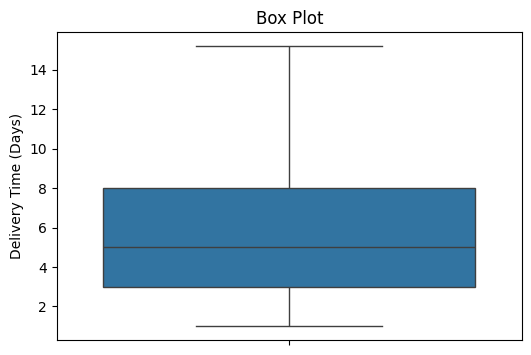

In [ ]:
# After removing outliers

plt.figure(figsize=(6, 4))
sns.boxplot(data=new_df['Delivery Time (Days)'])
plt.title('Box Plot')
plt.show()

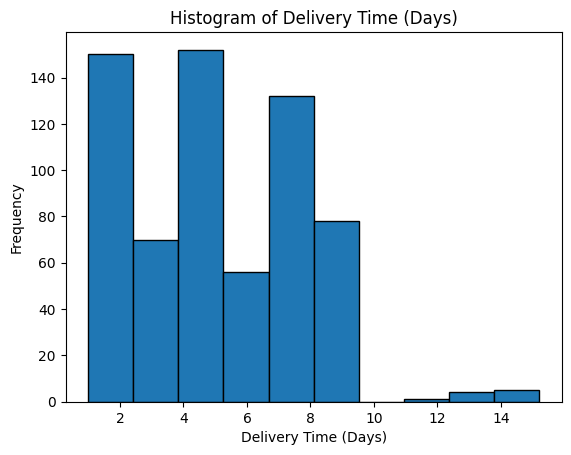

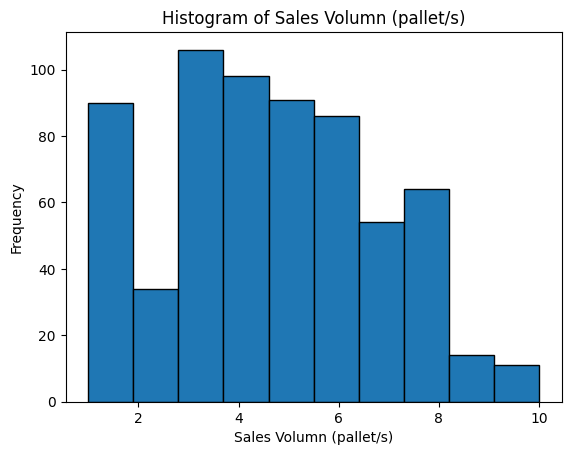

In [ ]:
# Check the normality of data

import matplotlib.pyplot as plt

plt.hist(new_df['Delivery Time (Days)'], edgecolor='black')
plt.title('Histogram of Delivery Time (Days)')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.show()

plt.hist(new_df['Sales Volumn (pallet/s)'], edgecolor='black')
plt.title('Histogram of Sales Volumn (pallet/s)')
plt.xlabel('Sales Volumn (pallet/s)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
new_df.head()

,Order Date,Customer ID,Sales Volumn (pallet/s),Sales Revenue,Pricing Tier,Region,Season,Promotion Applied,Delivery Time (Days)
0,2022-10-01,CUST002,1,1000,Tier 2,North America,Summer,Yes,8.0
1,2022-10-01,CUST003,4,4000,Tier 1,Europe,Summer,Yes,8.0
2,2022-10-01,CUST005,3,3000,Tier 1,North America,Summer,No,6.0
3,2022-10-01,CUST006,1,1000,Tier 2,Europe,Summer,No,9.0
4,2022-10-01,CUST008,5,5000,Tier 2,North America,Summer,Yes,3.0


Bivariate analysis

In [44]:
df['Delivery Time (Days)'].nunique()

18

<AxesSubplot:xlabel='Delivery Time (Days)'>

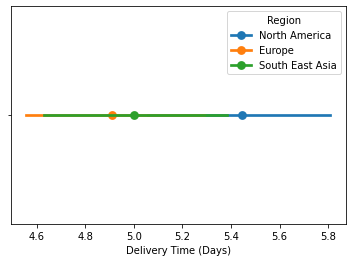

In [47]:
sns.pointplot(data=new_df,x='Delivery Time (Days)',hue='Region')

<AxesSubplot:xlabel='Delivery Time (Days)'>

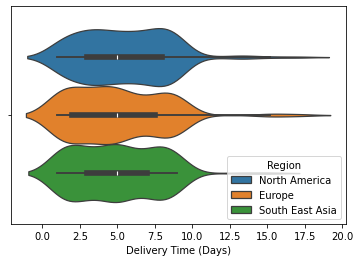

In [48]:
sns.violinplot(data=df,x='Delivery Time (Days)',hue='Region')

North America and South East Asia have wider distributions, indicating higher variability in the data.<br>
Europe has a narrower distribution, suggesting that values are more consistent and closer to each other.

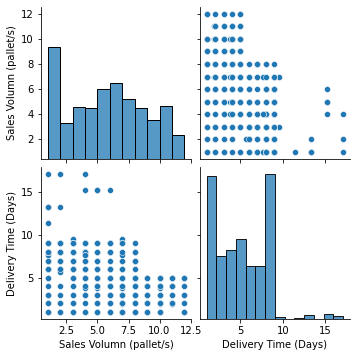

In [51]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='Delivery Time (Days)', ylabel='Sales Volumn (pallet/s)'>

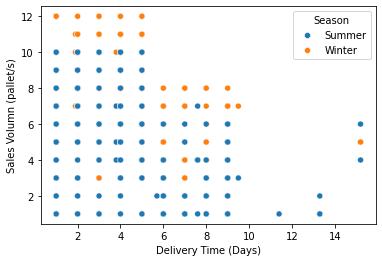

In [58]:
sns.scatterplot(data=new_df,x='Delivery Time (Days)',y='Sales Volumn (pallet/s)',hue='Season')

Conclusion: Here we can see that, IN winter season increase in delivery time shows decrease in Sales order Volumn

<AxesSubplot:xlabel='Delivery Time (Days)', ylabel='Sales Volumn (pallet/s)'>

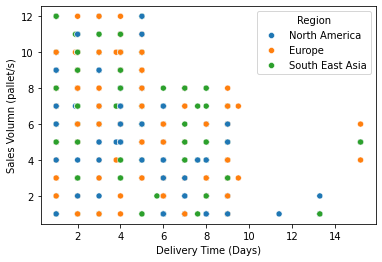

In [59]:
sns.scatterplot(data=new_df,x='Delivery Time (Days)',y='Sales Volumn (pallet/s)',hue='Region')

Conclusion: From above graph, we can say that there is no strong correlation between Sales Volumn and Regionwise delivery time

Text(0.5, 0, 'Month')

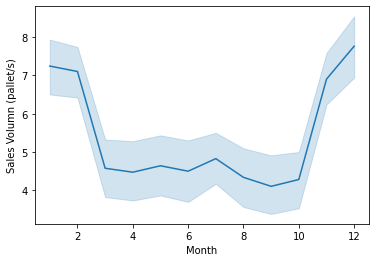

In [75]:
sns.lineplot(data=new_df,x=new_df['Order Date'].dt.month,y='Sales Volumn (pallet/s)')
plt.xlabel('Month')

Sales volumn is at low scale between March to Octomber

In [86]:
new_df.groupby(by='Season')['Sales Volumn (pallet/s)'].sum()

Season
Summer    1965
Winter    1508
Name: Sales Volumn (pallet/s), dtype: int64

<AxesSubplot:xlabel='Season', ylabel='count'>

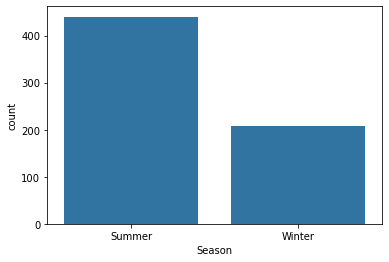

In [ ]:
sns.countplot(data=new_df,x='Season')

Conclusion: Most of the Orders are belongs to Summer Season